# Cactus Identification
## A slightly different approach

In [1]:
import pandas as pd
import keras
import os
import glob
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf



Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True)

validate_datagen = ImageDataGenerator(rescale=1./255.,
                                  vertical_flip = True,
                                  horizontal_flip = True)

test_generator = ImageDataGenerator(1./255.)

In [3]:
ls

cactus-identification-p1.ipynb  model_2.h5              test/
cactus_Id_2.ipynb               model_Best.h5           train/
model.h5                        self_split_data/        train.csv
model_1.h5                      tensorflow_dockerfile/  train_2/


In [5]:
train_generator = train_datagen.flow_from_directory(
        './self_split_data/sorted_training',
        target_size=(32,32),
        batch_size=32,
        class_mode='binary')

validation_generator = validate_datagen.flow_from_directory(
        './self_split_data/validation',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

test_generator = test_generator.flow_from_directory(
        './self_split_data/test_sorted',
        target_size=(32,32),
        batch_size=32,
        shuffle=False,
        class_mode='binary')



Found 12528 images belonging to 2 classes.
Found 3500 images belonging to 2 classes.
Found 1472 images belonging to 2 classes.


In [6]:
model = keras.models.Sequential()

layer1 = Conv2D(32, (3, 3),activation='relu', padding='same',
                 input_shape=(32,32,3))
layer2 = Conv2D(32, (3, 3), activation='relu')

layer3 = Conv2D(64, (3, 3), activation='relu', padding='same')

layer4 = Conv2D(64, (3, 3), activation='relu')

model.add(layer1)
model.add(layer2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layer3)
model.add(layer4)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [7]:
steps_per = 12528 // 32
val_steps = 3500 // 32

history = model.fit_generator(generator=train_generator, 
                    steps_per_epoch=steps_per, 
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
391/391 [==============================] - 117s 298ms/step - loss: 0.2338 - acc: 0.9025 - val_loss: 0.0966 - val_acc: 0.9610
Epoch 2/25
391/391 [==============================] - 9s 24ms/step - loss: 0.1144 - acc: 0.9620 - val_loss: 0.1885 - val_acc: 0.9224
Epoch 3/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0950 - acc: 0.9680 - val_loss: 0.0809 - val_acc: 0.9680
Epoch 4/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0719 - acc: 0.9752 - val_loss: 0.0538 - val_acc: 0.9853
Epoch 5/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0684 - acc: 0.9783 - val_loss: 0.0464 - val_acc: 0.9839
Epoch 6/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0983 - val_acc: 0.9686
Epoch 7/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0688 - acc: 0.9812 - val_loss: 0.0308 - val_acc: 0.9902
Epoch 8/25
391/391

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_loss_acc(history, eps):
    history_dict = history.history
    epochs = range(1, eps + 1)
    __plot_loss(history_dict, epochs)
    __plot_acc(history_dict, epochs)

def __plot_loss(history_dict, epochs):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

   
    plt.plot(epochs, loss_values, 'g', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def __plot_acc(history_dict, epochs):
    plt.clf()

    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

def prin_report(y_test, y_pred_test):
    print(classification_report(y_test, y_pred_test))
    
def prin_accs(history):
    print("training accuracy: {}".format(history.history['acc'][-1]))
    print("validation accuracy: {}".format(history.history['val_acc'][-1]))
    print("loss: {}".format(history.history['loss'][-1]))
    print("validation loss: {}".format(history.history['val_loss'][-1]))
    

In [10]:
model.save('model2.h5')

In [11]:
ls

cactus-identification-p1.ipynb  model_2.h5              train/
cactus_Id_2.ipynb               model_Best.h5           train.csv
model.h5                        self_split_data/        train_2/
model2.h5                       tensorflow_dockerfile/
model_1.h5                      test/


In [16]:
prin_accs(history)

training accuracy: 0.9899167733674776
validation accuracy: 0.9780853517877739
loss: 0.04278845981518106
validation loss: 0.12273031244661955


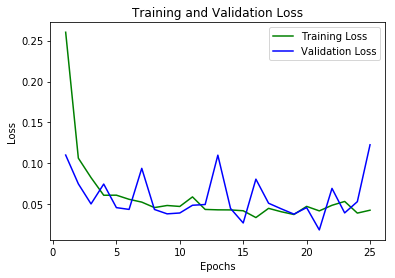

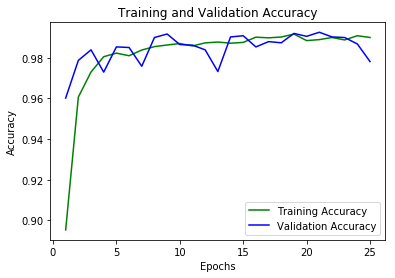

In [17]:
plot_loss_acc(history, 25)

In [12]:
test_generator.reset()
pred = model.predict_generator(test_generator, steps = 46)
print(pred.shape)

/usr/local/lib/python3.5/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(1472, 1)


In [13]:
print(pred)
print(test_generator.classes)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[0 0 0 ... 1 1 1]


In [14]:
classes = np.around(pred)

In [15]:
print(confusion_matrix(test_generator.classes, classes))

[[ 365    3]
 [  22 1082]]


In [16]:
prin_report(test_generator.classes, classes)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       368
           1       1.00      0.98      0.99      1104

    accuracy                           0.98      1472
   macro avg       0.97      0.99      0.98      1472
weighted avg       0.98      0.98      0.98      1472



In [28]:
model.evaluate_generator(test_generator, steps = 46)

/usr/local/lib/python3.5/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[0.4044262128126856, 0.9748641304347826]

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [117]:
def plot_conv_weights(model, layer_name):
    w = model.get_layer(name=layer_name).get_weights()[0]
    w = np.squeeze(w)
    w = w.reshape((w.shape[0], w.shape[1], w.shape[2]*w.shape[3])) 
    
    fig, axs = plt.subplots(6,6, figsize=(12,12))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    
    axs = axs.ravel() 
    for i in range(32):
        axs[i].imshow(w[:,:,i])
        axs[i].set_title(str(i))

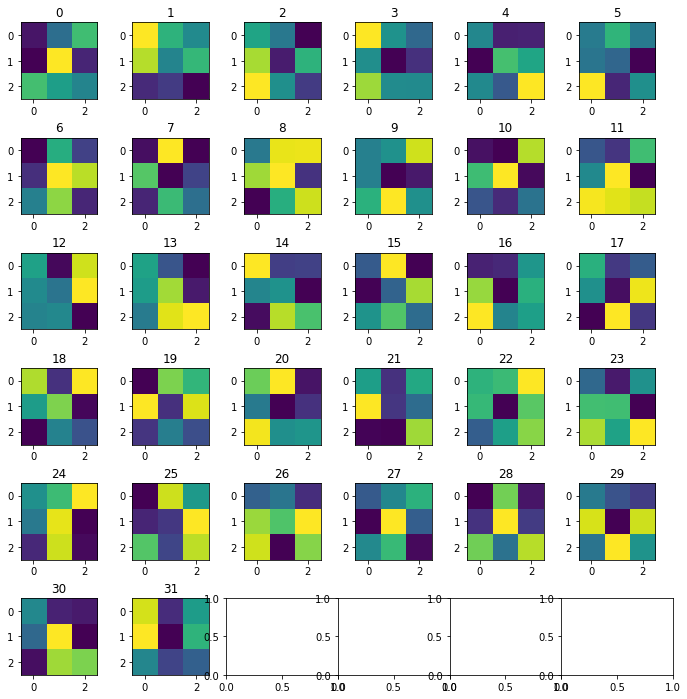

In [118]:
plot_conv_weights(model, 'conv2d_1')

In [110]:
from matplotlib.image import imread

image = imread('./train/0004be2cfeaba1c0361d39e2b000257b.jpg')
image.shape
image = image.reshape(32, 32, 3)

An image that contains cactus.

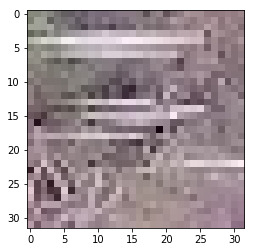

In [111]:
plt.imshow(image)

In [112]:
image = image.reshape(1,32, 32, 3)

In [92]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*6,col_size*6))
    kernels = 0
    for row in range(0,row_size):
        for col in range(0,col_size):
            if kernels == 32:
                break
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1
            kernels += 1

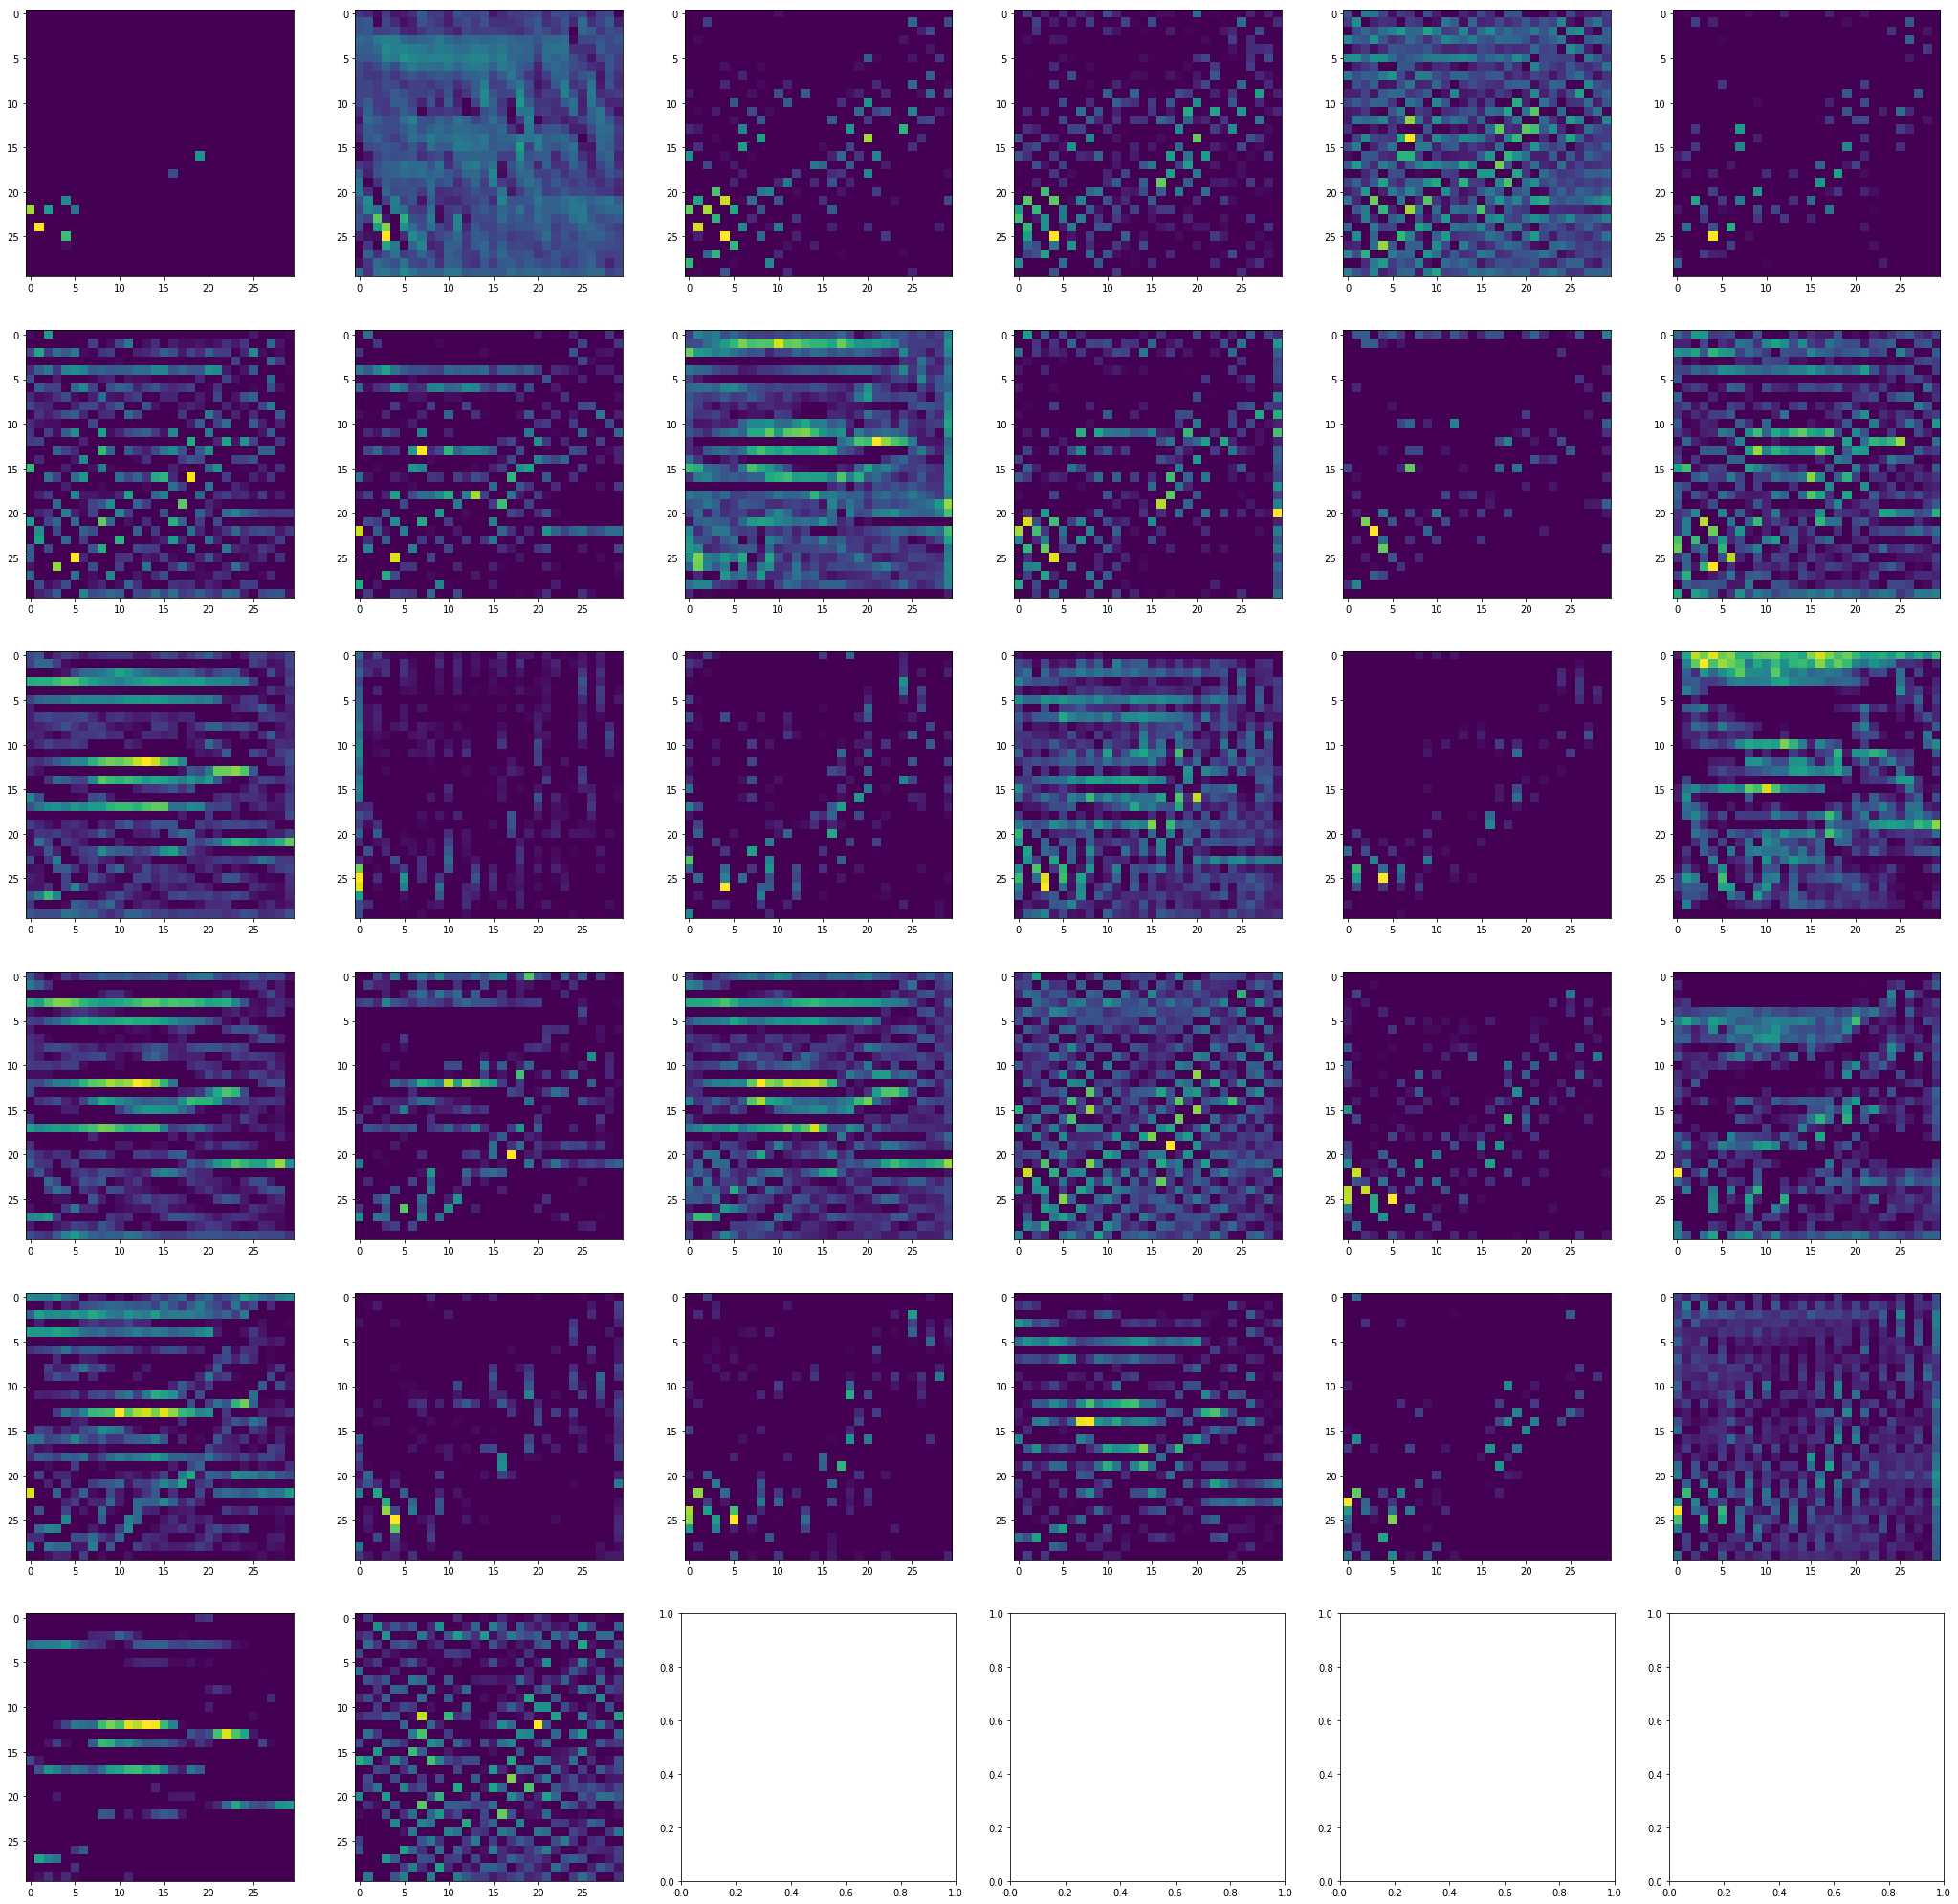

In [93]:
display_activation(activations, 6, 6, 1)